### Exercise 1

1) Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


In [2]:
data = load_breast_cancer()

In [3]:
X, y = data.data, data.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [7]:
y_predict = knn.predict(X_test_scaled)

In [8]:
accuracy = sum(y_test == y_predict) / len(y_test)
accuracy


np.float64(0.9649122807017544)

2) Repeat Step 1 using pipelines and report the score.

In [9]:
from sklearn.pipeline import Pipeline

In [10]:
pipeline = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [12]:
y_predict_pipeline = pipeline.predict(X_test)

In [13]:
accuracy_pipeline = sum(y_test == y_predict_pipeline) / len(y_test)
accuracy_pipeline

np.float64(0.9649122807017544)

3) Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor. 

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'knn__n_neighbors': [3, 5, 7, 9, 11]}

In [16]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11]},
             scoring='accuracy')

In [17]:
best_n_neighbors = grid_search.best_params_['knn__n_neighbors']
best_score = grid_search.best_score_

In [18]:
print(f"Best number of neighbors: {best_n_neighbors}")
print(f"Best cross-validation score: {best_score:.4f}")

Best number of neighbors: 3
Best cross-validation score: 0.9626


4)	Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor.

- Use `from sklearn.neighbors import KNeighborsRegressor'
- You need to split the data into X and y. 
- Check the data shape
- Check the data types
- Print the column names of the data frame
- Create a scatterplot of each feature against the target variable
- Create alist of features that are numeric and not numeric
- Create a pipeline of imputer and standard scaler for the numeric features
- Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
- You can create your column transformer in different ways
- Finally create a pipeline of column transformer and kNeighborsRegressor
- Split your data into train and test datasets
- Report the score on the test dataset



In [37]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor

In [20]:
df = pd.read_csv("bike_day_raw.csv")

In [21]:
df.shape

(731, 11)

In [ ]:
data_types = df.dtypes

In [25]:
data_types

season          int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [26]:
df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [27]:
import matplotlib.pyplot as plt

In [28]:
X = df.drop(columns=["cnt"])

In [29]:
y = df["cnt"]


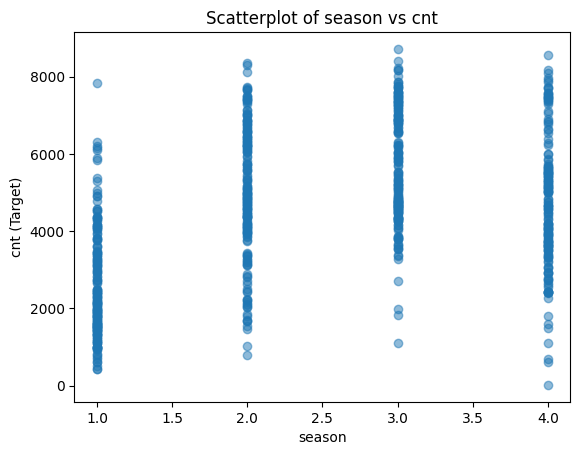

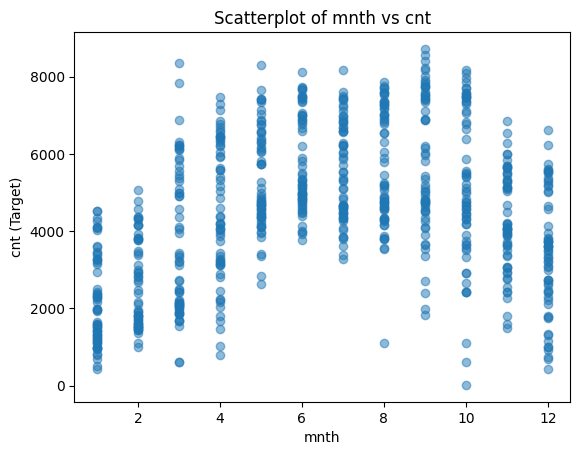

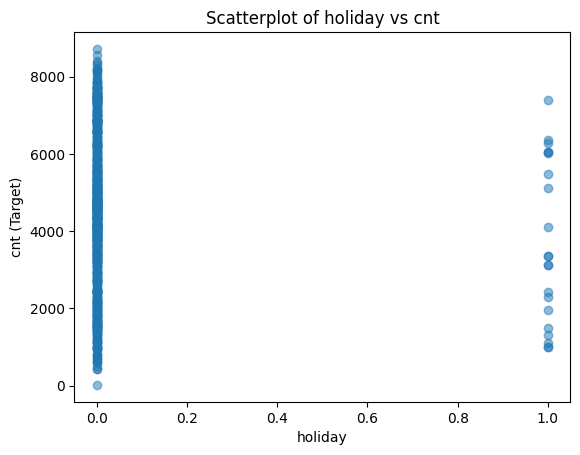

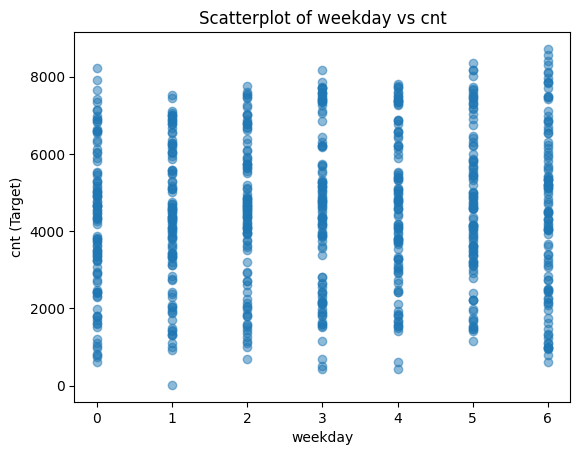

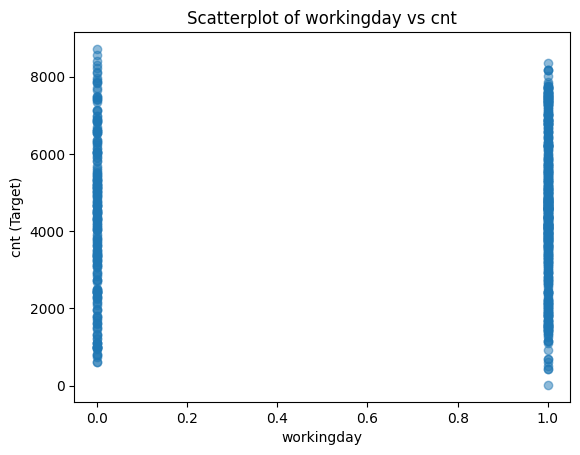

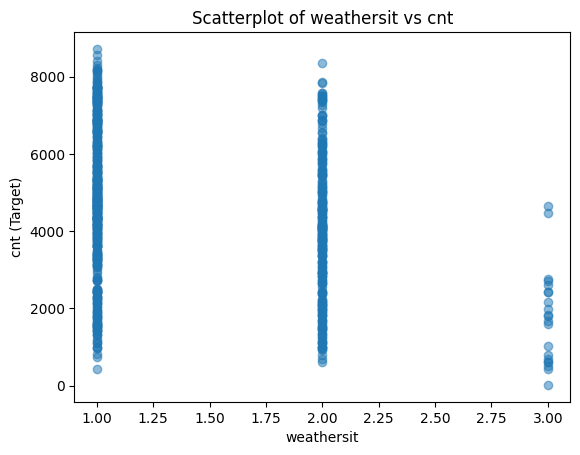

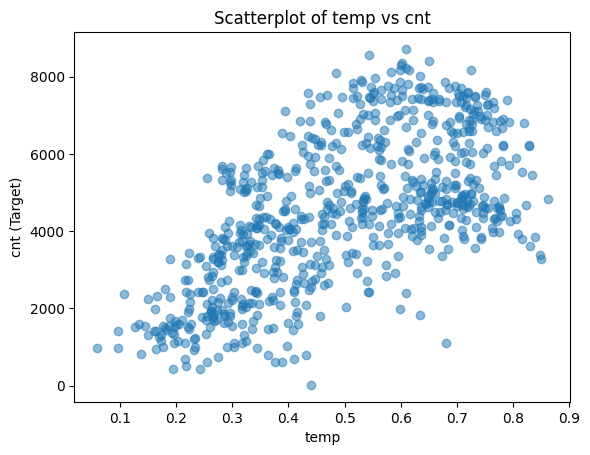

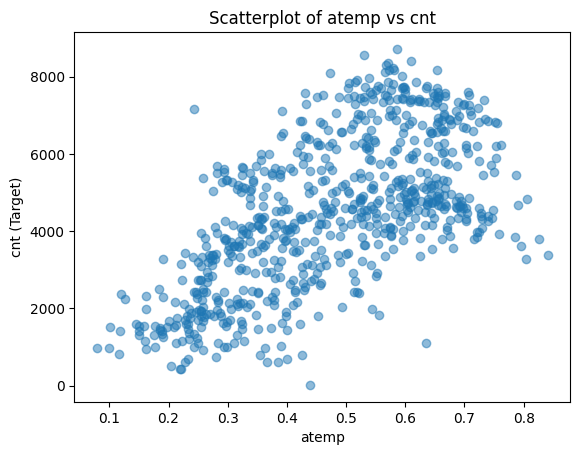

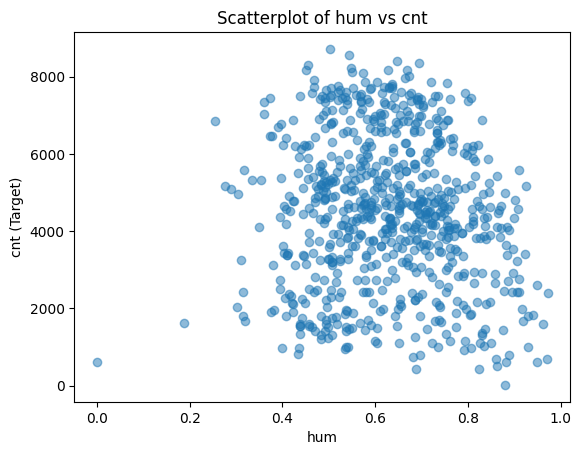

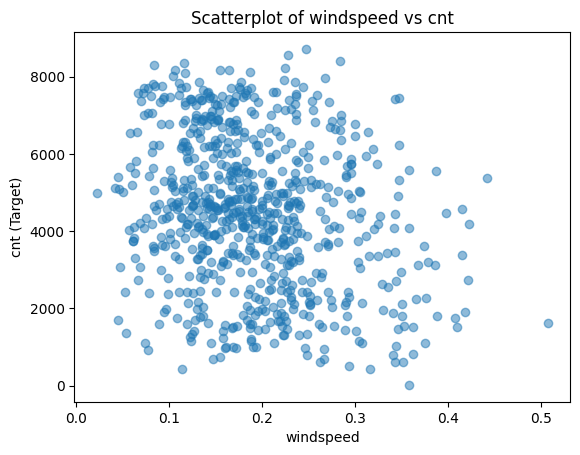

In [30]:
for column in X.columns:
    plt.scatter(X[column], y, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel("cnt (Target)")
    plt.title(f"Scatterplot of {column} vs cnt")
    plt.show()


In [31]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numeric_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_features, non_numeric_features

(['season',
  'mnth',
  'holiday',
  'weekday',
  'workingday',
  'weathersit',
  'temp',
  'atemp',
  'hum',
  'windspeed'],
 [])

In [33]:
numeric_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")), 
    ("scaler", StandardScaler())  
])


In [34]:
preprocessor = ColumnTransformer([
    ("num", numeric_pipeline, numeric_features)
])


In [38]:
model_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", KNeighborsRegressor(n_neighbors=5))  # Default k=5
])


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['season', 'mnth', 'holiday',
                                                   'weekday', 'workingday',
                                                   'weathersit', 'temp',
                                                   'atemp', 'hum',
                                                   'windspeed'])])),
                ('regressor', KNeighborsRegressor())])

In [42]:
score = model_pipeline.score(X_test, y_test)
score

0.5778954555125666